# HW3 Machine Learning for Public Policy

## Changes to the previos assignments

[Find the Report at the End of this notebook]

In [1]:
from magic_loop import *
from hw2_improved import *
%matplotlib inline

In [2]:
df = pd.read_csv("../hw2/credit-data.csv")

In [3]:
describe_data(df)

 
*********************************
Description of the data
*********************************
            PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age        zipcode  NumberOfTime30-59DaysPastDueNotWorse  \
count  150000.000000  150000.000000                         150000.000000   
mean       52.295207   60648.81

/Users/ruy/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


'Done'

In [4]:
# Here, we detect missing values in MonthlyIncome and number of dependents
df = fill_na(df, "MonthlyIncome", "mean")
df = fill_na(df, "NumberOfDependents", "median")

In [5]:
describe_data(df)

 
*********************************
Description of the data
*********************************
            PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age        zipcode  NumberOfTime30-59DaysPastDueNotWorse  \
count  150000.000000  150000.000000                         150000.000000   
mean       52.295207   60648.81

'Done'

In [6]:
# df.columns = ['PersonID',
#  'serious_dlq',
#  'revolving',
#  'age',
#  'zipcode',
#  '30_59_days',
#  'DebtRatio',
#  'MonthlyIncome',
#  'open_credits',
#  '90_late',
#  'real_state',
#  '60_89_days',
#  'dependents']

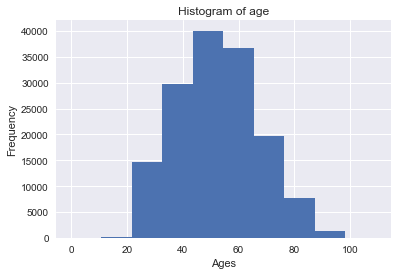

Histogram done


In [7]:
plot_histogram(df, "age", "Ages", "age.png", y_label = "Frequency")

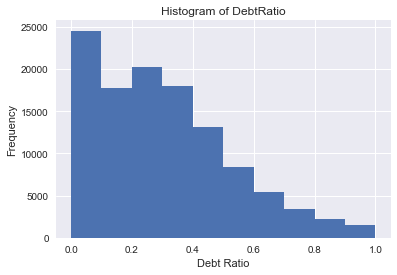

Histogram done


In [8]:
plot_histogram(df, "DebtRatio", "Debt Ratio", "debt.png", y_label = "Frequency", threshold = 1)

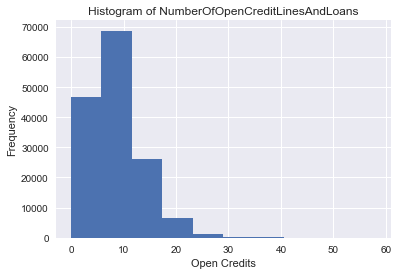

Histogram done


In [9]:
plot_histogram(df, "NumberOfOpenCreditLinesAndLoans", "Open Credits", "open_credits.png", y_label = "Frequency")

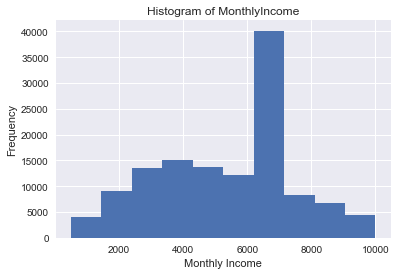

Histogram done


In [10]:
df_to_plot = df["MonthlyIncome"][df["MonthlyIncome"] > 500].to_frame()
plot_histogram(df_to_plot, "MonthlyIncome", "Monthly Income", "income.png", y_label = "Frequency", threshold=10000)

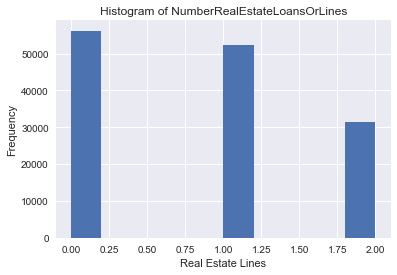

Histogram done


In [11]:
plot_histogram(df, "NumberRealEstateLoansOrLines", "Real Estate Lines", "restate.png", y_label = "Frequency", threshold=3)

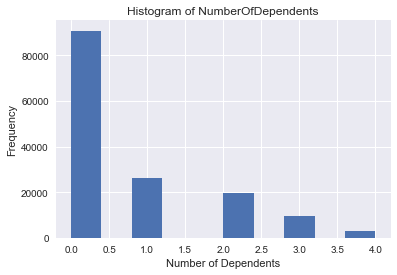

Histogram done


In [12]:
plot_histogram(df, "NumberOfDependents", "Number of Dependents", "dependents.png", y_label = "Frequency", threshold=5)

In [13]:
d_serious = df.groupby(["SeriousDlqin2yrs"]).size().reset_index()

In [14]:
d_serious

,SeriousDlqin2yrs,0
0,0,139974
1,1,10026


In [15]:
percentage_ones = 10026/ (10026 + 139974)

In [16]:
percentage_ones

0.06684

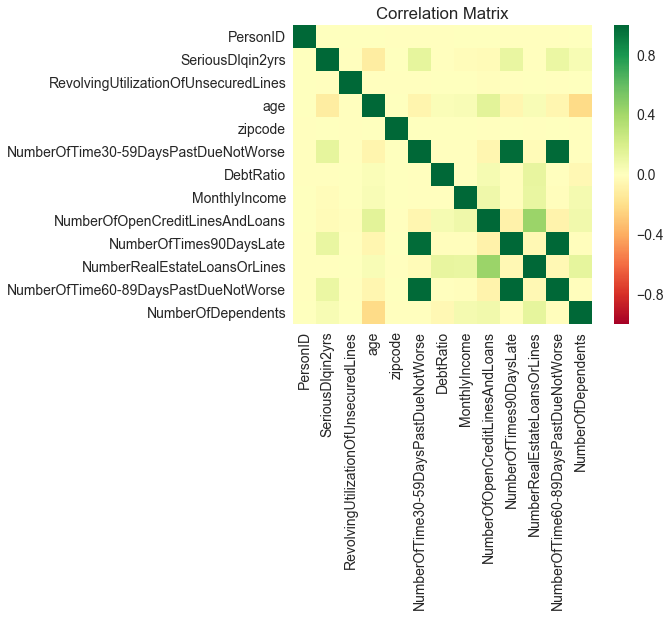

In [17]:
 plot_corr_matrix(df)

In [18]:
make_slices(df, "SeriousDlqin2yrs")

,SeriousDlqin2yrs,PersonID,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,74968.042429,6.168855,52.751375,60648.732507,0.280109,357.151168,6732.277204,8.493620,0.135225,1.020368,0.126666,0.723527
1,1,75453.643427,4.367282,45.926591,60649.892081,2.388490,295.121066,5803.851610,7.882306,2.091362,0.988530,1.828047,0.931279


In [19]:
make_slices(df, "NumberOfDependents")

,NumberOfDependents,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
0,0.0,75030.878955,0.058067,5.885823,54.620968,60648.985158,0.444201,447.671074,6095.980598,8.047718,0.315339,0.892046,0.291546
1,1.0,74694.312889,0.073529,4.852905,51.851117,60648.686769,0.365405,174.621397,7165.797064,9.175179,0.185553,1.143829,0.156901
2,2.0,75256.489192,0.081139,7.710358,46.460609,60648.251818,0.413636,242.657069,7510.637864,9.031657,0.205102,1.263754,0.182307
3,3.0,75186.902668,0.088263,9.341881,45.901086,60648.580196,0.361489,228.205045,8262.248157,8.938416,0.163239,1.267637,0.126542
4,4.0,74510.530748,0.103774,1.909806,45.562544,60649.604822,0.442348,212.753479,8547.146447,8.966108,0.205101,1.282320,0.171209
5,5.0,74607.856568,0.091153,0.393077,46.151475,60646.713137,0.461126,198.931910,9062.282320,8.979893,0.262735,1.286863,0.231903
6,6.0,75261.689873,0.151899,0.437257,47.075949,60648.240506,0.341772,126.818586,8584.403607,8.753165,0.139241,1.202532,0.120253
7,7.0,76384.294118,0.098039,0.401806,48.392157,60644.725490,0.372549,144.332806,8845.851813,8.196078,0.137255,1.235294,0.156863
8,8.0,82622.083333,0.083333,0.332304,49.541667,60649.750000,0.166667,88.093734,8176.060103,7.416667,0.166667,1.250000,0.000000
9,9.0,98030.000000,0.000000,0.351158,45.800000,60663.400000,0.000000,718.681982,8165.044247,9.800000,0.200000,1.000000,0.000000


## Main HW3

### Recal and  Precions Graphs

RF


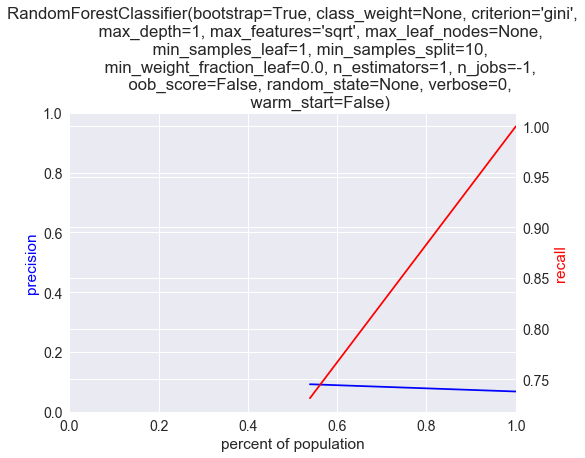

DT


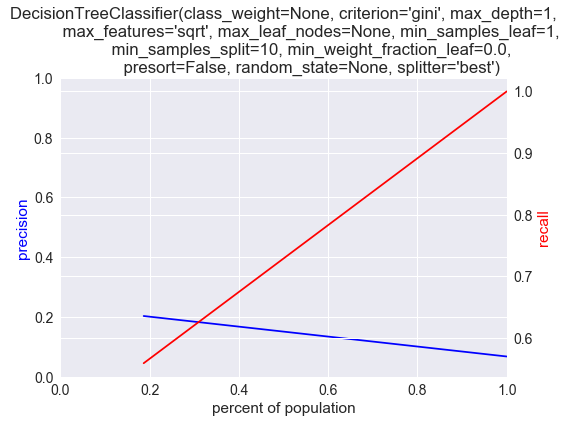

KNN


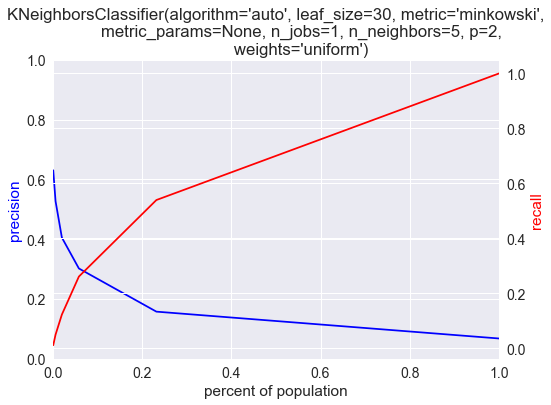

ET


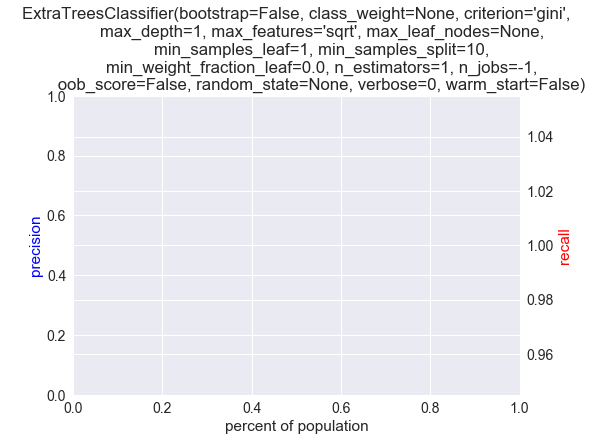

AB


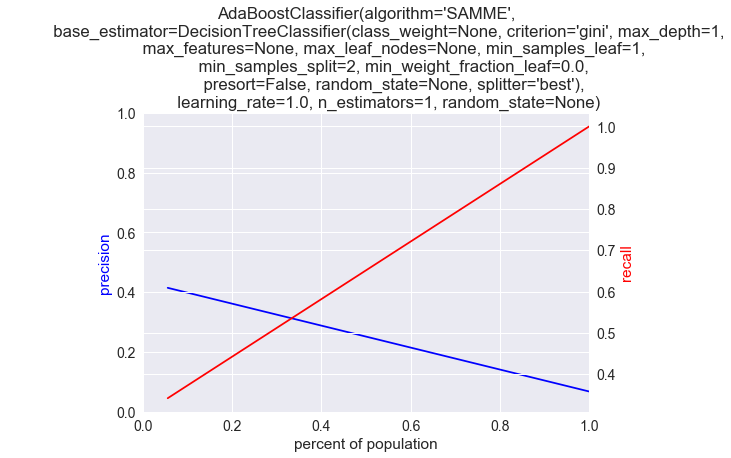

GB


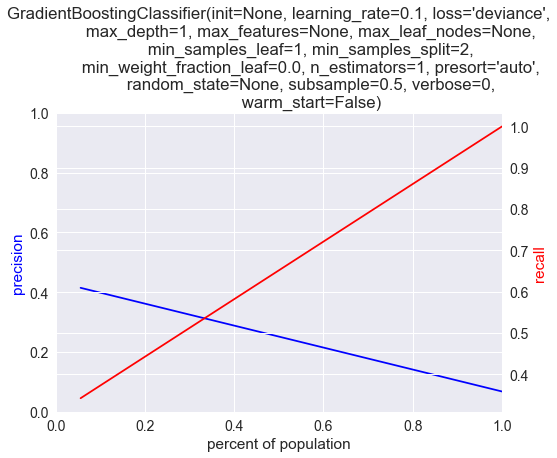

LR


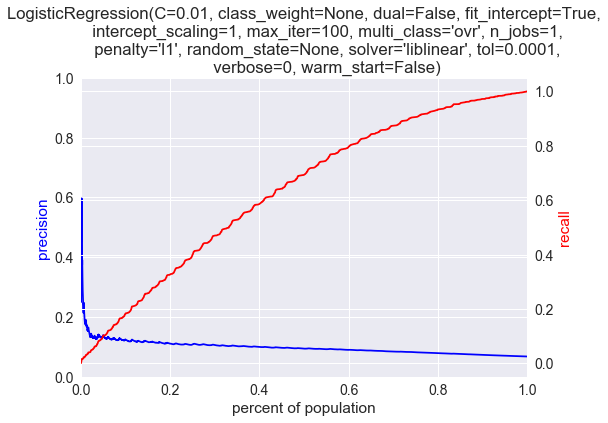

NB


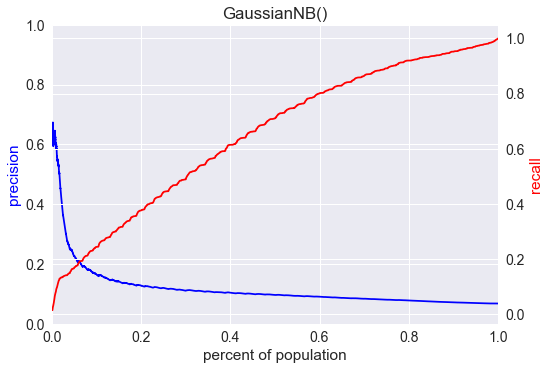

In [20]:
results_df, matrixes = main(df, "test")

### Confusion Matrices

The confusion matrix is:
       0  1
0  34953  0
1   2547  0
The visualization of the matrix:


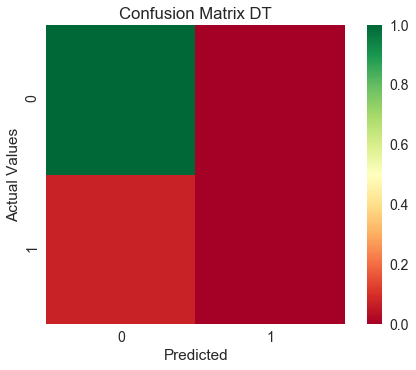

The confusion matrix is:
       0   1
0  34924  29
1   2495  52
The visualization of the matrix:


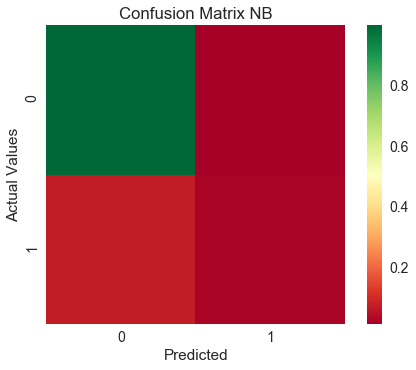

The confusion matrix is:
       0    1
0  34494  459
1   2234  313
The visualization of the matrix:


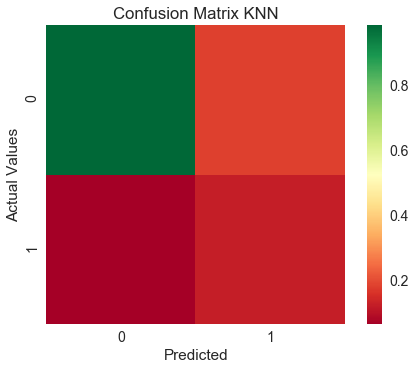

The confusion matrix is:
       0   1
0  34928  25
1   2510  37
The visualization of the matrix:


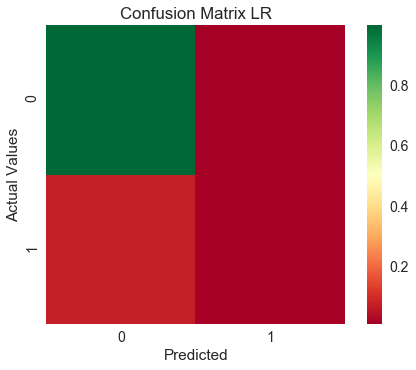

The confusion matrix is:
       0  1
0  34953  0
1   2547  0
The visualization of the matrix:


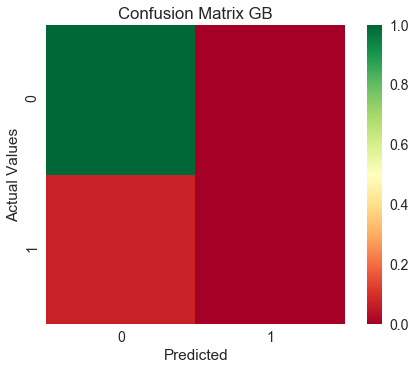

The confusion matrix is:
       0  1
0  34953  0
1   2547  0
The visualization of the matrix:


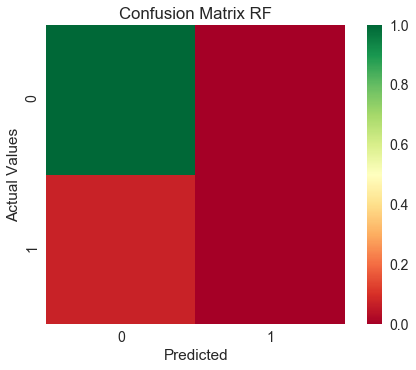

The confusion matrix is:
       0  1
0  34953  0
1   2547  0
The visualization of the matrix:


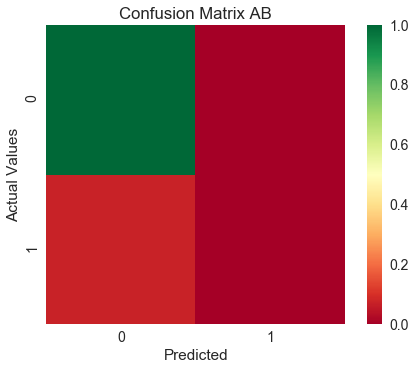

The confusion matrix is:
       0  1
0  34953  0
1   2547  0
The visualization of the matrix:


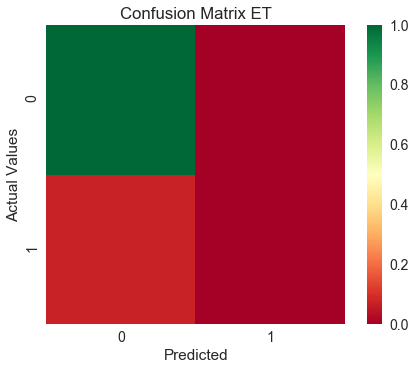

In [21]:
for key in matrixes:
    df = pd.DataFrame(matrixes[key])
    print("The confusion matrix is:")
    print(df)
    print("The visualization of the matrix:")
    confusion_matrix(df, key)

### Performance measures

In [22]:
x_locations = np.arange(len(results_df["model_type"]))

In [23]:
x_names = results_df["model_type"]

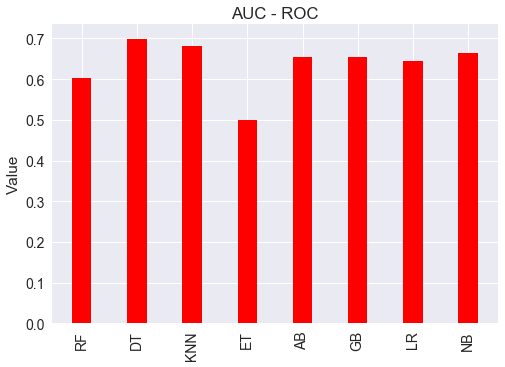

Bar graph done


In [24]:
bar_graph("AUC - ROC", x_locations, x_names, results_df["auc-roc"], "Value", "auc_roc.png")

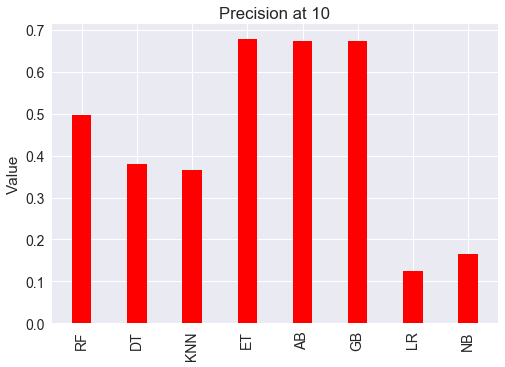

Bar graph done


In [25]:
bar_graph("Precision at 10", x_locations, x_names, results_df["p_at_10"], "Value", "p_10.png")

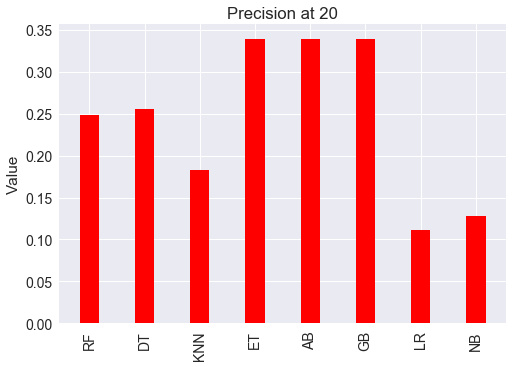

Bar graph done


In [26]:
bar_graph("Precision at 20", x_locations, x_names, results_df["p_at_20"], "Value", "p_20.png")

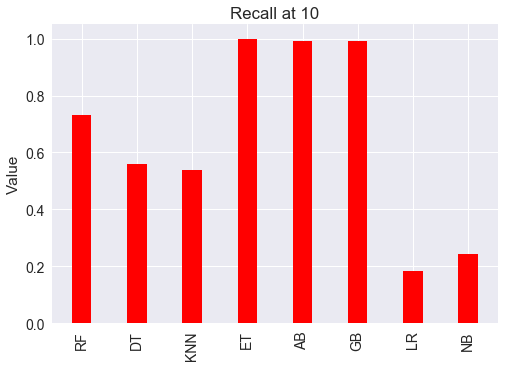

Bar graph done


In [27]:
bar_graph("Recall at 10", x_locations, x_names, results_df["r_at_10"], "Value", "r_10.png")

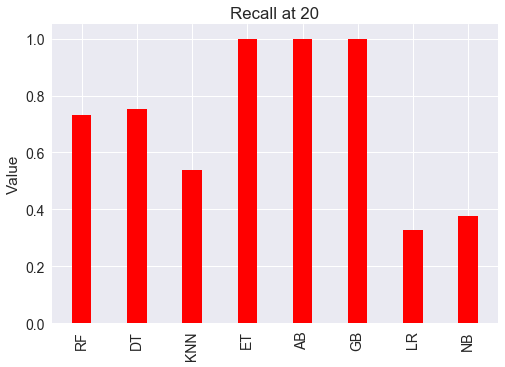

Bar graph done


In [28]:
bar_graph("Recall at 20", x_locations, x_names, results_df["r_at_20"], "Value", "r_20.png")

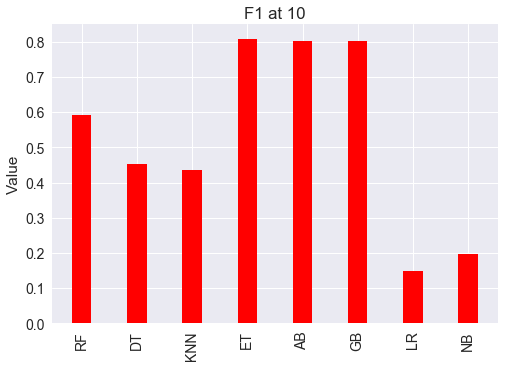

Bar graph done


In [29]:
bar_graph("F1 at 10", x_locations, x_names, results_df["f1_at_10"], "Value", "f1_10.png")

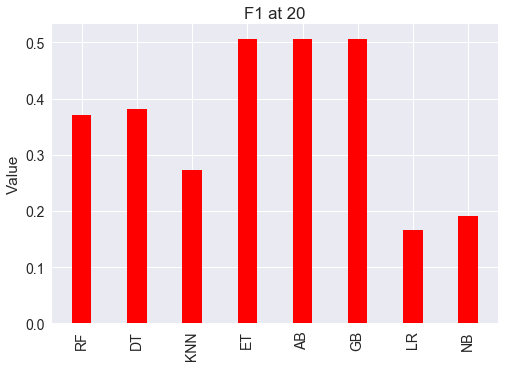

Bar graph done


In [30]:
bar_graph("F1 at 20", x_locations, x_names, results_df["f1_at_20"], "Value", "f1_20.png")

### Time to Run

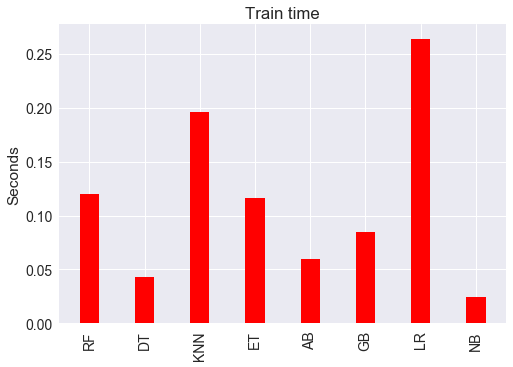

Bar graph done


In [31]:
bar_graph("Train time", x_locations, x_names, results_df["train_time"], "Seconds", "train_time.png")

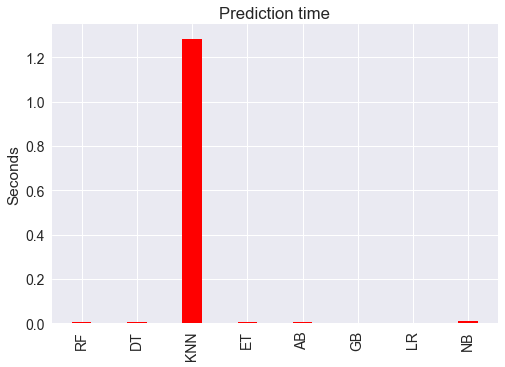

Bar graph done


In [32]:
bar_graph("Prediction time", x_locations, x_names, results_df["pred_time"], "Seconds", "prediction_time.png")

# Report

According to the results depicted by the graphs in the section Performance Measures, the best model overall is the random forest, followed by KNN and Gaussian NB, if we assess the models with the area under the curve. In the same vein, the model with the worst overall performance is Extra Trees Classifier. On the other hand, another measure of general performance of a model is F1 at k equal to 20. In this case, our best models are Extra Trees Classifier, Ada Boost Classifier, and Gradient Boosting Classifier.

However, precision at 10 and 20 shows another trend. The model with the worst performance in the first measure, Extra Tree Classifier, is one of the models with better performance here, along with Decision Tree Classifier, Ada Boost Classifier, and Gradient Boosting Classifier. Also, those models have the best values for recall at 10 and 20. 

The striking point is that one the models with one of the worst performance in precision and recall are one of the most classic examples of classification, that is to say, logistic regression. Furthermore, the training time of this model is exceptionally high, more than five times the time spending on training GausssianNB or a Decision Tree Classifier. 

Regarding prediction time, showed in the section Time to Run, the only model with a significant amount of time used for prediction was KNN. It makes sense, given that the machine needs to analyze the pairs of elements in each of the steps. 

The recommendation about what is the best model is related to the structure of our data. For instance, only about 7% of the observations are positive for our variable of interest. Then, we are more concerned to predict the risky individuals rather than get the best overall accuracy. In that framework, it is useful to evaluate the model regarding their predictions about true positives and recall. 

According to the recall at 20, the best models are Decision Tree Classifier, Extra Trees Classifier, Ada Boost Classifier, and Gradient Boosting Classifier. From those, the one calculated faster is Decision Tree Classifier. In addition to its speed, Decision Tree is an easy model to explain and analyze. However, it has a pitfall; it does not predict any of the values of or dependent variable. Its performance is the same as predicting that all the costumers are reliable and they will never experience 90 days past due delinquency or worse. 

As depicted in the confusion matrices, the model with the highest true positives is KNN with 313, then Gaussian NB with 52, and finally logistic regression with 37. All these models predict only a few of the actual values (the ones) which are 2547 (for the testing case). Then, all the models described are not optimal to this data. However, despite that KNN does not perform the best in precision, recall, F1, and it take a significant amount of time to run it (although it is small for the computer), I will recommend exploring further the KNN model and the Gaussian NB model.  Those were able to predict some of the actual values that any of the other models were not able to do.
